In [ ]:
from pathlib import Path

ROOT = Path(globals()['__vsc_ipynb_file__']).parent.parent
print(ROOT)

import sys
sys.path.append(str(ROOT))

In [144]:
from src.experiment import Experiment

from qiskit import qpy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from model_validator.validator import is_feasible

### 30 bonds -- 100 runs of the same problem

In [ ]:
num_bonds = 30
num_runs = 100

df = pd.DataFrame()
time_100runs = np.zeros(num_runs)
rel_gap_100runs = np.zeros(num_runs)
num_evals_100runs = np.zeros(num_runs)
is_feasible_100runs = np.zeros(num_runs)


for exp_id in range(num_runs):
    path = f'1/30bonds_1problem_100runs/Bonds{num_bonds}_TwoLocal2rep_piby3_AerSimulator_0p1/exp{exp_id}.pkl'
    ds = Experiment.read_experiment(path)
    time_100runs[exp_id] = ds.step3_time
    rel_gap_100runs[exp_id] = (ds.step3_result_best_fx-ds.refvalue)/ds.step3_result_best_fx
    num_evals_100runs[exp_id] = len(ds.step3_iter_best_fx)
    is_feasible_100runs[exp_id] = is_feasible('../data/1/30bonds_1problem_100runs/normalized_problem_30bonds_v3.lp',ds.step3_result_best_x)
    # print(f' Bonds: {num_bonds}\n Time: {ds.step3_time}\n num_evals: {len(ds.step3_iter_best_fx)}\n refval: {ds.refvalue}\n best_x: {ds.step3_result_best_fx}')

print(f"Mean time: {np.mean(time_100runs)}")
print(f"Mean rel. gap: {np.mean(rel_gap_100runs)}")
print(f"Num evals: {np.mean(num_evals_100runs)}")

Mean time: 1012.819284555912
Mean rel. gap: 0.17389538553126596
Num evals: 358.74


#### Is the solution feasible?

In [147]:
np.sum(is_feasible_100runs == True)/num_runs

np.float64(1.0)

#### Relative Gap

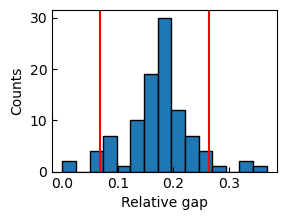

In [148]:
tail_right = np.percentile(rel_gap_100runs, q=95)
tail_left = np.percentile(rel_gap_100runs, q=5)

plt.figure(figsize=(2.9, 2.1))
plt.hist(rel_gap_100runs, bins=15, edgecolor='k')
plt.axvline(tail_right, c='red')
plt.axvline(tail_left, c='red')
plt.tick_params(axis='both', direction='in')
plt.xlabel("Relative gap")
plt.ylabel("Counts")
# plt.title("TwoLocal,alpha=0.1,rep=2,bilinear,penalty=1.1")
# plt.legend(
#     ncol=2,                # two columns
#     frameon=False,         # no border frame
#     loc='upper center',    # position (customize as needed)
#     bbox_to_anchor=(0.54, 1.05)
# )
plt.savefig("imgs/ONEPROBLEM100RUNS_RELGAP_TwoLocal_rep2_alpha0p1_bilinear.png", dpi=300, bbox_inches='tight')
plt.show()

#### Time

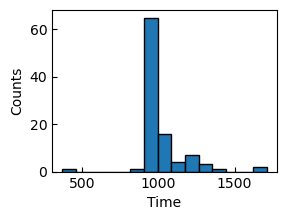

In [149]:
plt.figure(figsize=(2.9, 2.1))
plt.hist(time_100runs, bins=15, edgecolor='k')
# plt.axvline(tail_right, c='red')
# plt.axvline(tail_left, c='red')
plt.tick_params(axis='both', direction='in')
plt.xlabel("Time")
plt.ylabel("Counts")
# plt.title("TwoLocal,alpha=0.1,rep=2,bilinear,penalty=1.1")
# plt.legend(
#     ncol=2,                # two columns
#     frameon=False,         # no border frame
#     loc='upper center',    # position (customize as needed)
#     bbox_to_anchor=(0.54, 1.05)
# )
plt.savefig("imgs/ONEPROBLEM100RUNS_TIME_TwoLocal_rep2_alpha0p1_bilinear.png", dpi=300, bbox_inches='tight')
plt.show()

#### Quantum Iterations

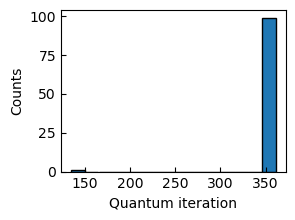

In [150]:
plt.figure(figsize=(2.9, 2.1))
plt.hist(num_evals_100runs, bins=15, edgecolor='k')
# plt.axvline(tail_right, c='red')
# plt.axvline(tail_left, c='red')
plt.tick_params(axis='both', direction='in')
plt.xlabel("Quantum iteration")
plt.ylabel("Counts")
# plt.title("TwoLocal,alpha=0.1,rep=2,bilinear,penalty=1.1")
# plt.legend(
#     ncol=2,                # two columns
#     frameon=False,         # no border frame
#     loc='upper center',    # position (customize as needed)
#     bbox_to_anchor=(0.54, 1.05)
# )
plt.savefig("imgs/ONEPROBLEM100RUNS_NUMEVALS_TwoLocal_rep2_alpha0p1_bilinear.png", dpi=300, bbox_inches='tight')
plt.show()

### 30 bonds -- 1 run of 100 different problems

In [ ]:
num_bonds = 30
exp_id = 0
num_problems = 100

df = pd.DataFrame()
time = np.zeros(num_problems)
rel_gap = np.zeros(num_problems)
num_evals = np.zeros(num_problems)
is_feasible_100problems = np.zeros(num_problems)


for id in range(num_problems):
    path = f'1/{num_bonds}bonds_100problems_1run/Bonds{num_bonds}_TwoLocal2rep_piby3_AerSimulator_{id}_0p1/exp{exp_id}.pkl'
    ds = Experiment.read_experiment(path)
    time[id] = ds.step3_time
    rel_gap[id] = (ds.step3_result_best_fx-ds.refvalue)/ds.step3_result_best_fx
    num_evals[id] = len(ds.step3_iter_best_fx)
    is_feasible_100problems[id] = is_feasible(f'../data/1/{num_bonds}bonds_100problems_1run/normalized_problem_30bonds_v3_{id}.lp',ds.step3_result_best_x)
    
    # print(f' Bonds: {num_bonds}\n Time: {ds.step3_time}\n num_evals: {len(ds.step3_iter_best_fx)}\n refval: {ds.refvalue}\n best_x: {ds.step3_result_best_fx}')

print(f"Mean time: {np.mean(time)}")
print(f"Mean rel. gap: {np.mean(rel_gap)}")
print(f"Num evals: {np.mean(num_evals)}")

Mean time: 821.6171900582314
Mean rel. gap: 0.1400121458250198
Num evals: 312.3


#### Is the solution feasible?

In [152]:
np.sum(is_feasible_100problems == True)/num_problems

np.float64(0.99)

In [153]:
is_feasible_100problems

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

#### Relative Gap

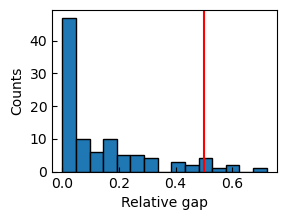

In [154]:
tail_right = np.percentile(rel_gap, q=95)
tail_left = np.percentile(rel_gap, q=5)

plt.figure(figsize=(2.9, 2.1))
plt.hist(rel_gap, bins=15, edgecolor='k')
plt.axvline(tail_right, c='red')
# plt.axvline(tail_left, c='red')
plt.tick_params(axis='both', direction='in')
plt.xlabel("Relative gap")
plt.ylabel("Counts")
# plt.title("TwoLocal,alpha=0.1,rep=2,bilinear,penalty=1.1")
# plt.legend(
#     ncol=2,                # two columns
#     frameon=False,         # no border frame
#     loc='upper center',    # position (customize as needed)
#     bbox_to_anchor=(0.54, 1.05)
# )
plt.savefig("imgs/100PROBLEM1RUN_RELGAP_TwoLocal_rep2_alpha0p1_bilinear.png", dpi=300, bbox_inches='tight')
plt.show()

#### Time

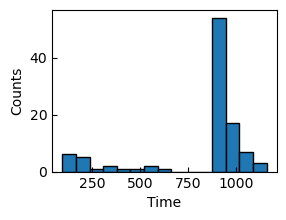

In [155]:
plt.figure(figsize=(2.9, 2.1))
plt.hist(time, bins=15, edgecolor='k')
# plt.axvline(tail_right, c='red')
# plt.axvline(tail_left, c='red')
plt.tick_params(axis='both', direction='in')
plt.xlabel("Time")
plt.ylabel("Counts")
# plt.title("TwoLocal,alpha=0.1,rep=2,bilinear,penalty=1.1")
# plt.legend(
#     ncol=2,                # two columns
#     frameon=False,         # no border frame
#     loc='upper center',    # position (customize as needed)
#     bbox_to_anchor=(0.54, 1.05)
# )
plt.savefig("imgs/100PROBLEM1RUN_TIME_TwoLocal_rep2_alpha0p1_bilinear.png", dpi=300, bbox_inches='tight')
plt.show()

#### Quantum Iterations

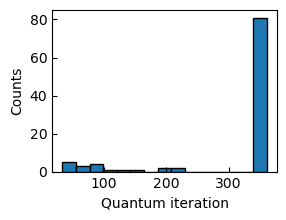

In [156]:
plt.figure(figsize=(2.9, 2.1))
plt.hist(num_evals, bins=15, edgecolor='k')
# plt.axvline(tail_right, c='red')
# plt.axvline(tail_left, c='red')
plt.tick_params(axis='both', direction='in')
plt.xlabel("Quantum iteration")
plt.ylabel("Counts")
# plt.title("TwoLocal,alpha=0.1,rep=2,bilinear,penalty=1.1")
# plt.legend(
#     ncol=2,                # two columns
#     frameon=False,         # no border frame
#     loc='upper center',    # position (customize as needed)
#     bbox_to_anchor=(0.54, 1.05)
# )
plt.savefig("imgs/100PROBLEM1RUN_NUMEVALS_TwoLocal_rep2_alpha0p1_bilinear.png", dpi=300, bbox_inches='tight')
plt.show()

### boxplots: compare both experiments

#### Time

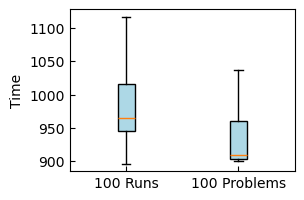

In [157]:
plt.figure(figsize=(2.9, 2.1))
plt.boxplot([time_100runs, time], patch_artist=True, boxprops=dict(facecolor='lightblue'),showfliers=False)
plt.tick_params(axis='both', direction='in')
# plt.xlabel("Quantum iteration")
plt.ylabel("Time")
plt.xticks([1, 2], ['100 Runs', '100 Problems'])
plt.savefig("imgs/BOXPLOT_TIME_TwoLocal_rep2_alpha0p1_bilinear.png", dpi=300, bbox_inches='tight')
plt.show()

#### Relative Gap

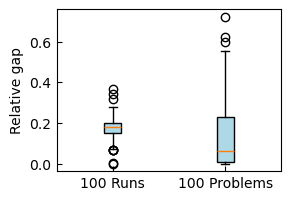

In [158]:
plt.figure(figsize=(2.9, 2.1))
plt.boxplot([rel_gap_100runs, rel_gap], patch_artist=True, boxprops=dict(facecolor='lightblue'))#,showfliers=False)
plt.tick_params(axis='both', direction='in')
# plt.xlabel("Quantum iteration")
plt.ylabel("Relative gap")
plt.xticks([1, 2], ['100 Runs', '100 Problems'])
plt.savefig("imgs/BOXPLOT_RELGAP_TwoLocal_rep2_alpha0p1_bilinear.png", dpi=300, bbox_inches='tight')
plt.show()

#### Quantum Iterations

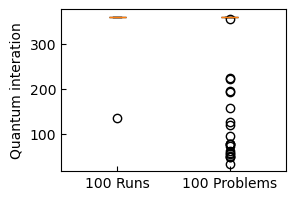

In [159]:
plt.figure(figsize=(2.9, 2.1))
plt.boxplot([num_evals_100runs, num_evals], patch_artist=True, boxprops=dict(facecolor='lightblue'))#,showfliers=False)
plt.tick_params(axis='both', direction='in')
# plt.xlabel("Quantum iteration")
plt.ylabel("Quantum interation")
plt.xticks([1, 2], ['100 Runs', '100 Problems'])
plt.savefig("imgs/BOXPLOT_NUMEVALS_TwoLocal_rep2_alpha0p1_bilinear.png", dpi=300, bbox_inches='tight')
plt.show()